In [4]:
import numpy as np
import tarfile
import os

## Extract files


In [6]:


# Caminho para o arquivo
caminho_arquivo = "MAE_dataset_subset.tar.gz"

# Pasta de destino para extração
destino = "."

# Cria a pasta de destino se não existir
os.makedirs(destino, exist_ok=True)

# Abre e extrai o conteúdo
with tarfile.open(caminho_arquivo, "r:gz") as tar:
    tar.extractall(path=destino)

print(f"Arquivo extraído para: {destino}")


Arquivo extraído para: .


## Images Shape


In [7]:
# read all numpy files from new_sample folder

folder_path = 'MAE_dataset_subset'
files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
data = []
for file in files:
    file_path = os.path.join(folder_path, file)
    data.append(np.load(file_path))


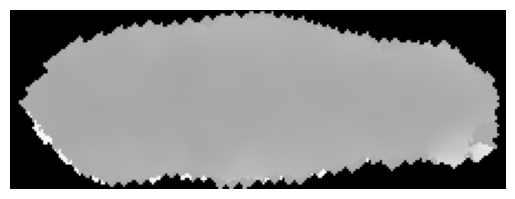

In [11]:
# plotar uma imagem
import matplotlib.pyplot as plt
import random

# Escolher um índice aleatório
indice_aleatorio = random.randint(0, len(data) - 1)
# Carregar a imagem correspondente
imagem = data[indice_aleatorio]
# Exibir a imagem
plt.imshow(imagem, cmap='gray')
plt.axis('off')  # Desativar os eixos
plt.show()


In [8]:
# chose a random sample from the data size 100

import random
random_sample = random.sample(data, 100)

#  print the shape of the random sample

for i, sample in enumerate(random_sample):
    print(f"Sample {i+1} shape: {sample.shape}")


Sample 1 shape: (163, 410)
Sample 2 shape: (127, 284)
Sample 3 shape: (169, 422)
Sample 4 shape: (151, 428)
Sample 5 shape: (97, 275)
Sample 6 shape: (86, 216)
Sample 7 shape: (110, 275)
Sample 8 shape: (127, 345)
Sample 9 shape: (177, 458)
Sample 10 shape: (116, 302)
Sample 11 shape: (92, 242)
Sample 12 shape: (156, 408)
Sample 13 shape: (107, 273)
Sample 14 shape: (149, 404)
Sample 15 shape: (152, 395)
Sample 16 shape: (162, 475)
Sample 17 shape: (84, 212)
Sample 18 shape: (85, 254)
Sample 19 shape: (84, 229)
Sample 20 shape: (171, 443)
Sample 21 shape: (113, 309)
Sample 22 shape: (153, 432)
Sample 23 shape: (91, 194)
Sample 24 shape: (96, 237)
Sample 25 shape: (139, 313)
Sample 26 shape: (84, 238)
Sample 27 shape: (148, 425)
Sample 28 shape: (84, 199)
Sample 29 shape: (167, 427)
Sample 30 shape: (121, 333)
Sample 31 shape: (126, 305)
Sample 32 shape: (163, 435)
Sample 33 shape: (167, 500)
Sample 34 shape: (153, 427)
Sample 35 shape: (130, 326)
Sample 36 shape: (148, 341)
Sample 37 s

## Get max shape

In [9]:
# iterate over the all samples and get max height and width

max_height = 0
max_width = 0
count = 0
for sample in data:
    height, width = sample.shape
    if height > max_height:
        max_height = height
    if width > max_width:
        max_width = width

    count += 1

print(f"Max height: {max_height}")
print(f"Max width: {max_width}")


Max height: 203
Max width: 561


In [10]:
# standardize the shape of the samples to near above max height and width divisible by 16

target_height = int(np.ceil(max_height / 16) * 16)
target_width = int(np.ceil(max_width / 16 ) * 16)
print(f"Target height: {target_height}")
print(f"Target width: {target_width}")

# add padding and ensure all samples are the same size
padded_samples = []

for sample in data:
    height, width = sample.shape
    pad_height = target_height - height
    pad_width = target_width - width

    # Calculate padding for height and width
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    # Pad the sample
    padded_sample = np.pad(sample, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=0)
    padded_samples.append(padded_sample)
    print(f"Padded sample shape: {padded_sample.shape}")
# save the padded samples to a new folder
import os
import numpy as np
# Create a new directory to save the padded samples
output_dir = 'dataset'
os.makedirs(output_dir, exist_ok=True)
# Save each padded sample to a .npy file
for i, padded_sample in enumerate(padded_samples):
    output_path = os.path.join(output_dir, f'padded_sample_{i}.npy')
    np.save(output_path, padded_sample)
    print(f"Saved padded sample {i} to {output_path}")


Target height: 208
Target width: 576
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Padded sample shape: (208, 576)
Pad